# Lab 1: Muon Decay

## Prelab

1. We compute the standard deviation of the Poisson probability distribution. The Poisson distribution's density is given by
$$ p(R) = \frac{\nu^{R}e^{-\nu}}{R!}, $$
where $\nu$ is the average rate of occurence and $R$ is the number of events detected.  The variance $\sigma^2$ is given by the useful relation:
$$ \sigma^2 = \mathbb{E}[R^2] - \mathbb{E}[R]^2.$$
The mean is
$$ \mathbb{E}[R] = \sum_{R=0}^{\infty} R p(R) = \nu. $$
The second moment is  $$ \mathbb{E}[R^2] = \sum_{R=0}^{\infty} R^2 p(R) = \nu + \nu^2. $$
We conclude that
$$ \sigma^2 = \nu $$.

2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt
from matplotlib import rcParams

In [ ]:
# Define the model

def poisson(r, nu):
  # r : number of occurances
  # nu : mean rate of occurances
  model = np.power(nu, r) * np.exp(-nu) / np.math.factorial(r)
  return model

def chi2(ydata, ytheo, yerr):
    chi = 0
    for idx in range(len(ydata)):
        chi += (ydata[idx] - ytheo[idx])**2 / yerr[idx]**2
    return chi

In [ ]:
# Generate data

nu_test = 30
x_test = np.linspace(0,100,101)
y_noise = 0.001 * np.random.normal(0,1,len(x_test))
y_test = [poisson(x, nu_test) for x in x_test]

In [ ]:
# Import

xdata = x_test
ydata = y_test + y_noise

model = np.vectorize(poisson)
yunc = np.ones(len(xdata)) / len(xdata)
nu0 = 25

In [ ]:
# Fit the data
params1, cov1 = opt.curve_fit(model, xdata=xdata, ydata=ydata, sigma = yunc, p0=[45], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal nu: ', params1)# optimal parameters for model
print('Error in nu: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: '+str(chsq))
print('Number of DOF is: '+str(dof))

Optimal nu:  [29.94763056]
Error in nu:  [0.3364271]
Chi squared is: 34167305.795969084
Number of DOF is: 100


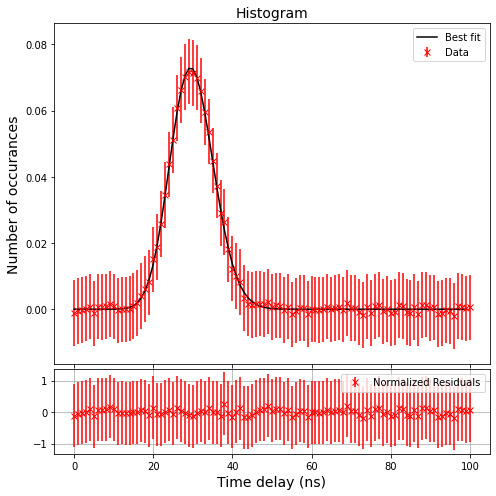

In [ ]:
# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(7,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(xdata[0],xdata[-1],1)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data')
axes_opt[0].plot(xPlot1, model(xPlot1, *params1), color='black', label='Best fit')
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Histogram', fontsize=14)
axes_opt[0].set_ylabel('Number of occurances', fontsize=14)
axes_opt[1].set_xlabel('Time delay (ns)', fontsize=14)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
#plt.savefig(fig_path+'/peak_'+str(idx)+'.pdf', dpi=300)
plt.show()
#plt.clf()

In [ ]:
# Define the model

def poisson(r, nu):
  # r : number of occurances
  # nu : mean rate of occurances
  model = np.power(nu, r) * np.exp(-nu) / np.math.factorial(r)
  return model

def model(r, params):
  # r : number of occurances
  y = 0
  for nu in params:
    y += np.power(nu, r) * np.exp(-nu) / np.math.factorial(r)
  return y


def chi2(ydata, ytheo, yerr):
    chi = 0
    for idx in range(len(ydata)):
        chi += (ydata[idx] - ytheo[idx])**2 / yerr[idx]
    return chi#

#Calibration

## Data

1. 2.7500 micro sec = 26 HEX = 38 DEC
2. 2.5000 micro sec = 20 HEX = 32 DEC
3. 2.0000 microsec = 1A HEX = 26 DEC

In [ ]:
# Import Data
xdata = [38, 32, 26]
ydata = [2.75, 2.5, 2.0]
yunc = [0.0001, 0.0001, 0.0001]

In [ ]:
#Model
def linear(x, a, b):
  return a * x + b
model = np.vectorize(linear, otypes=[float])

# Fit the data
params1, cov1 = opt.curve_fit(model, xdata=xdata, ydata=ydata, sigma=np.ones(len(xdata)), p0=[1,0], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal a: ', params1)# optimal parameters for model
print('Error in b: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: '+str(chsq))
print('Number of DOF is: '+str(dof))

Optimal a:  [0.0625     0.41666667]
Error in b:  [0.11785113 3.81517438]
Chi squared is: 26888020.83345062
Number of DOF is: 1


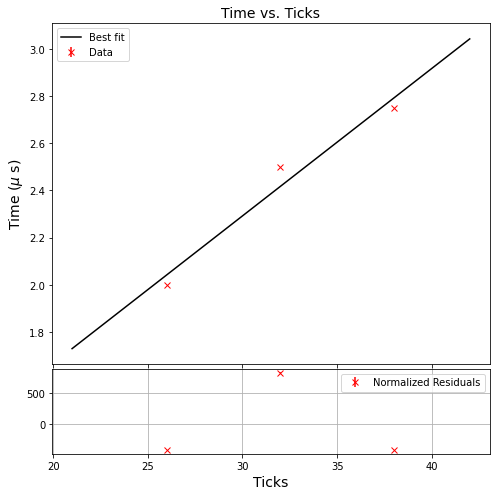

In [ ]:
# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(7,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(min(xdata)-5, max(xdata)+5,)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data')
axes_opt[0].plot(xPlot1, model(xPlot1, *params1), color='black', label='Best fit')
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Time vs. Ticks', fontsize=14)
axes_opt[0].set_ylabel('Time ($\mu$ s)', fontsize=14)
axes_opt[1].set_xlabel('Ticks', fontsize=14)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('calibration.pdf', dpi=300)
plt.show()
#plt.clf()

#Acquisition

In [ ]:
def my_model(x, t1, a1, t2, a2):
  peak1 = np.exp(-x/t1)
  peak2 = np.exp(-x/t2)
  return a1 * peak1 + a2 * peak2

my_model = np.vectorize(my_model, otypes=[float])

pars = 35, 10, 10, 3

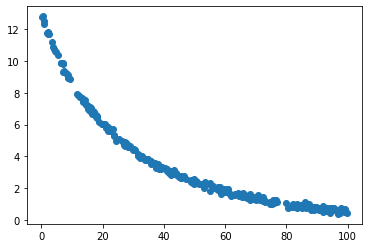

In [ ]:
# Generate Data

N = 300
xdata = np.random.rand(N) * 100
yclean = my_model(xdata, *pars)
noise = np.random.normal(0, 0.1, size=N)
ydata = yclean + noise

plt.scatter(xdata, ydata)

In [ ]:
#Model
yunc = np.ones(N) * .01

# Fit the data
params1, cov1 = opt.curve_fit(my_model, xdata=xdata, ydata=ydata, sigma=yunc, p0=[35,10, 80, 3], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal: ', params1)# optimal parameters for model
print('Errors: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, my_model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: '+str(chsq))
print('Number of DOF is: '+str(dof))

Optimal:  [ 9.83604038  2.83808253 34.73437554 10.09813929]
Errors:  [0.06750314 0.01850601 0.03951774 0.01993552]
Chi squared is: 9983032751.885544
Number of DOF is: 296


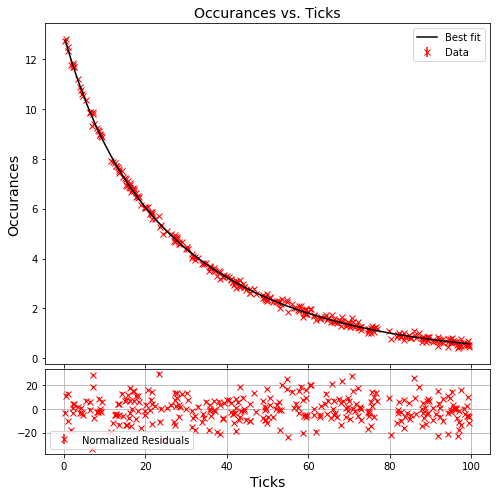

In [ ]:
# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(7,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(min(xdata), max(xdata),0.1)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data', zorder=0)
axes_opt[0].plot(xPlot1, my_model(xPlot1, *params1), color='black', label='Best fit', zorder=1)
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - my_model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Occurances vs. Ticks', fontsize=14)
axes_opt[0].set_ylabel('Occurances', fontsize=14)
axes_opt[1].set_xlabel('Ticks', fontsize=14)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('calibration.pdf', dpi=300)
plt.show()
#plt.clf()

In [ ]:
# Jackknife

time_data = []
N = len(xdata)

for k in range(len(xdata)):
  xdata_ = np.delete(xdata, k)
  ydata_ = np.delete(ydata, k)
  yunc_ = np.delete(yunc, k)

  params1, cov1 = opt.curve_fit(my_model, xdata=xdata_, ydata=ydata_, sigma=yunc_, p0=[40, 10, 1, 0], absolute_sigma=True)
  time_data.append(params1[0])

time = np.mean(time_data)
time_err = ((N - 1) / N) * np.dot(time_data - time, time_data - time)
print(time, time_err)



34.73446653166221 0.16799983126573476


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt
from matplotlib import rcParams

In [ ]:
def my_model(x, t1, a1, t2, a2):
  peak1 = np.exp(-x/t1)
  peak2 = np.exp(-x/t2)
  return a1 * peak1 + a2 * peak2

def chi2(ydata, ytheo, yerr):
    chisq = 0
    for idx in range(len(ydata)):
        chisq += (ydata[idx] - ytheo[idx])**2 / yerr[idx]
    return chisq

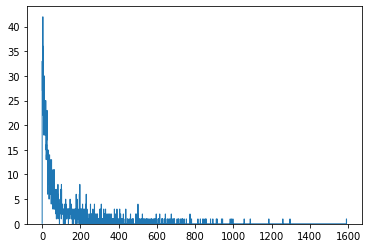

In [ ]:
time1 = 28
time2 = 200

y1 = np.random.exponential(time1, 1000)
y2 = np.random.exponential(time2, 1000)
times = np.concatenate((y1, y2))

count, bins, fig = plt.hist(times, bins=len(times), histtype='step')

In [ ]:
#Model

xdata, ydata = bins[:-1], count
yunc = np.ones(len(xdata))

# Fit the data
params1, cov1 = opt.curve_fit(my_model, xdata=xdata, ydata=ydata, sigma=yunc, p0=[28, 45, 200, 4], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal: ', params1)# optimal parameters for model
print('Errors: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, my_model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: '+str(chsq))
print('Number of DOF is: '+str(dof))

Optimal:  [ 25.42114907  29.91011782 207.51479917   3.9533338 ]
Errors:  [ 0.68551657  0.40335117 15.01758553  0.31876183]
Chi squared is: 1687147780.369
Number of DOF is: 1996


In [ ]:
# Bootstrap

xdata, ydata = bins[:-1], count
yunc = np.ones(len(xdata))

N, M = 20000, 10
pars_data = []

for k in range(M):

  sample = np.random.randint(0, len(xdata), size=N)
  xdata_ = xdata[sample]
  ydata_ = ydata[sample]
  yunc_ = yunc[sample]

  params1, cov1 = opt.curve_fit(my_model, xdata=xdata_, ydata=ydata_, sigma=yunc_, p0=params1, absolute_sigma=True)
  pars_data.append(params1)

pars_data


[array([ 25.25973801,  39.34476754, 204.91699398,   4.65332659]),
 array([ 25.60897549,  38.86263198, 210.46638621,   4.45321404]),
 array([ 25.0326705 ,  38.8952942 , 202.42306529,   4.71678217]),
 array([ 25.11076604,  39.57152581, 199.07214612,   4.78967121]),
 array([ 27.04042779,  39.11067573, 219.6259226 ,   4.09453092]),
 array([ 24.46632017,  38.67053342, 194.56469449,   5.12198118]),
 array([ 24.4272322 ,  38.89270182, 193.50749417,   4.94710338]),
 array([ 24.8072572 ,  39.36073871, 201.25184211,   4.70005803]),
 array([ 25.25264675,  39.67198815, 212.27427497,   4.4519343 ]),
 array([ 24.8427312 ,  39.80478818, 201.2711296 ,   4.68031046])]

In [ ]:
print(np.mean(pars_data, axis=0))
print(np.std(pars_data, axis=0))

[ 25.18487654  39.21856455 203.93739495   4.66089123]
[0.70794028 0.3686909  7.72098542 0.26902688]


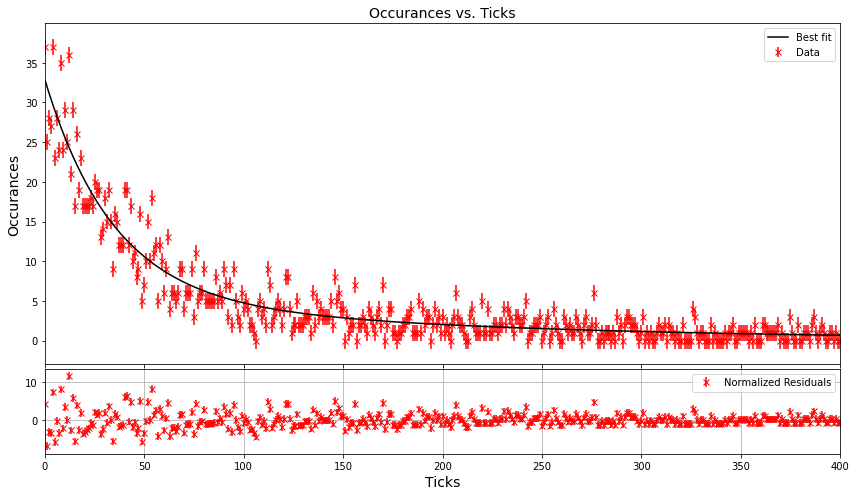

In [ ]:
# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(12,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(min(xdata), max(xdata),1)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data', zorder=0)
axes_opt[0].plot(xPlot1, my_model(xPlot1, *params1), color='black', label='Best fit', zorder=1)
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - my_model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Occurances vs. Ticks', fontsize=14)
axes_opt[0].set_ylabel('Occurances', fontsize=14)
axes_opt[1].set_xlabel('Ticks', fontsize=14)
plt.xlim(0, 400)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('fit.pdf', dpi=300)
plt.show()
#plt.clf()

In [ ]:
params1
print(np.sqrt(cov))

array([ 34.00518035,  27.2237017 , 189.70910408,   5.6143295 ])

# Let's run some data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt
from matplotlib import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

paths = [
    '/content/gdrive/MyDrive/2022 Fall/Experimental Physics/muonTV.txt',
    '/content/gdrive/MyDrive/2022 Fall/Experimental Physics/run1_clean.txt',
    '/content/gdrive/MyDrive/2022 Fall/Experimental Physics/run2_clean.txt',
    '/content/gdrive/MyDrive/2022 Fall/Experimental Physics/run3_clean.txt'
]

def my_hex_to_int(path):
  lines = open(path, 'r').read()
  return [int(hexstring, 16) for hexstring in lines.split()]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
calibration = [2.750, 2.5, 2.0]
data = [my_hex_to_int(files) for files in paths]

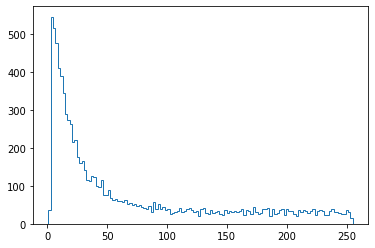

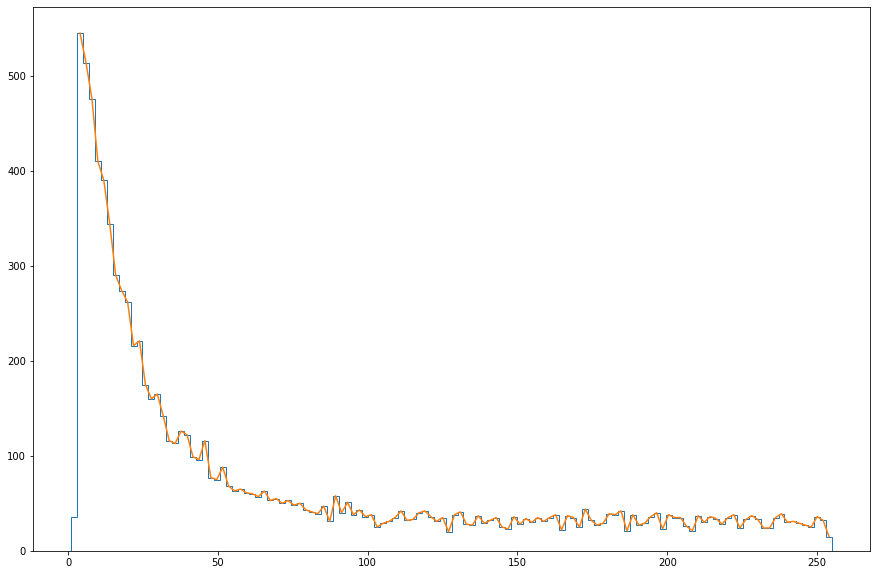

In [ ]:
#Data

# Curve Fitting

plt.figure(figsize=(15,10))

times = data[0]
count, bins, fig = plt.hist(times, bins=128, histtype='step')

count, bins = count[1:], bins[1:]

xdata, ydata = bins[:-1] + 0.5*(bins[1]-bins[0]), count # get the midpoint of the bins
yunc = np.sqrt(ydata)
plt.plot(xdata, ydata)
plt.show()

In [ ]:
def my_model(x, t1, a1, t2, a2, c):
  peak1 = np.exp(-x/t1)
  peak2 = np.exp(-x/t2)
  return a1 * peak1 + a2 * peak2 + c

def chi2(ydata, ytheo, yerr):
    chisq = 0
    for idx in range(len(ydata)):
        chisq += (ydata[idx] - ytheo[idx])**2 / yerr[idx]
    return chisq

In [ ]:


# Fit the data
params1, cov1 = opt.curve_fit(my_model, xdata=xdata, ydata=ydata, sigma=yunc, p0=[28, 600, 100, 10, 1], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal: ', params1)# optimal parameters for model
print('Errors: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

#chsq = chi2(xdata, my_model(xdata, *params1), yunc)
#dof = len(xdata) - len(params1)
#print('Chi squared is: '+ str(chsq))
#print('Number of DOF is: '+ str(dof))

Optimal:  [ 14.09471927 516.31396331  30.91090562 173.90965824  29.61398061]
Errors:  [  3.11621956 162.73174734  10.61930972 179.19939691   0.94837766]


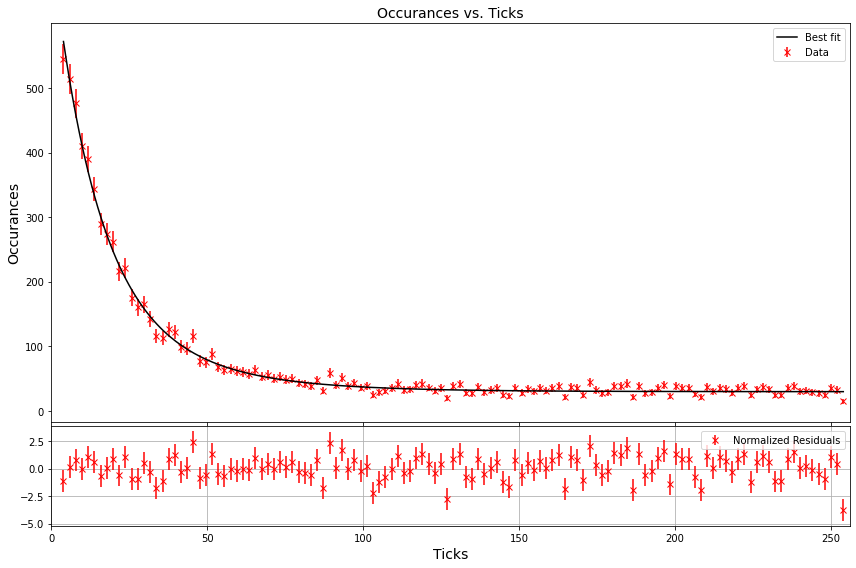

In [ ]:
# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(12,8), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(np.min(xdata), np.max(xdata), 1)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data', zorder=0)
axes_opt[0].plot(xPlot1, my_model(xPlot1, *params1), color='black', label='Best fit', zorder=1)
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - my_model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Occurances vs. Ticks', fontsize=14)
axes_opt[0].set_ylabel('Occurances', fontsize=14)
axes_opt[1].set_xlabel('Ticks', fontsize=14)
plt.xlim(0, 256)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('fit.pdf', dpi=300)
plt.show()
#plt.clf()

Optimal a:  [0.0625     0.41666667]
Error in b:  [0.11785113 3.81517438]
Chi squared is:  26888020.83345062
Number of DOF is:  1


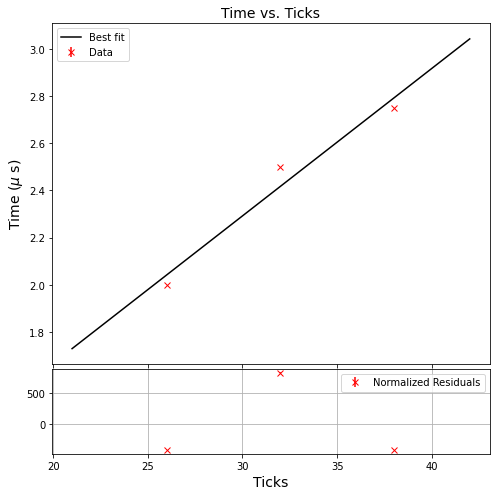

In [ ]:
# Import Data
xdata = [38, 32, 26]
ydata = [2.75, 2.5, 2.0]
yunc = [0.0001, 0.0001, 0.0001]

#Model
def linear(x, a, b):
  return a * x + b
model = np.vectorize(linear, otypes=[float])

# Fit the data
params1, cov1 = opt.curve_fit(model, xdata=xdata, ydata=ydata, sigma=np.ones(len(xdata)), p0=[1,0], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal a: ', params1)# optimal parameters for model
print('Error in b: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: ', chsq)
print('Number of DOF is: ', dof)

# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(7,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.arange(np.min(xdata)-5, np.max(xdata)+5,)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data')
axes_opt[0].plot(xPlot1, model(xPlot1, *params1), color='black', label='Best fit')
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Time vs. Ticks', fontsize=14)
axes_opt[0].set_ylabel('Time ($\mu$ s)', fontsize=14)
axes_opt[1].set_xlabel('Ticks', fontsize=14)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('calibration.pdf', dpi=300)
plt.show()
#plt.clf()

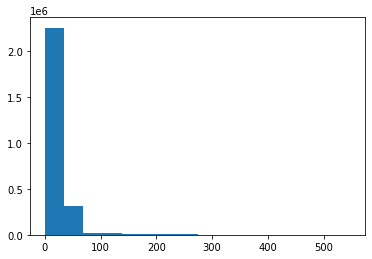

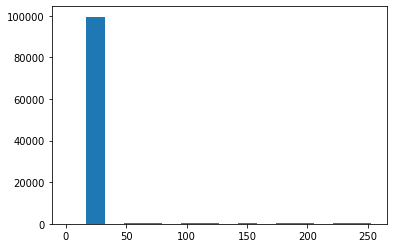

In [ ]:
plt.hist(data[2],16)
plt.show()

plt.hist(data[3],16)
plt.show()

In [ ]:
data_times = [2.75, 2.5, 2.0]

data1 = np.array([i for i in data[1] if int(i) <= 50])
data2 = np.array([i for i in data[2] if int(i) <= 50])
data3 = np.array([i for i in data[3] if int(i) <= 50])
data_clean = [data1, data2, data3]

data_ticks = [np.average(i) for i in data_clean]
info_ticks = [np.std(i) for i in data_clean]

Optimal a:  [12.4941792   0.76391153]
Error in b:  [1.0297186  2.61010898]
Chi squared is:  6314.921016007158
Number of DOF is:  1


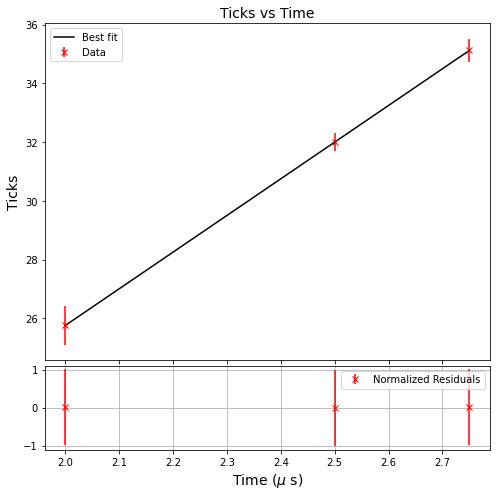

In [ ]:
#Model
def linear(x, a, b):
  return a * x + b
model = np.vectorize(linear, otypes=[float])

xdata = data_times
ydata = data_ticks
yunc = info_ticks

# Fit the data
params1, cov1 = opt.curve_fit(model, xdata=xdata, ydata=ydata, sigma=yunc, p0=[1,0], absolute_sigma=True) #p0=[best guess for b1, best guess for b2]

print('Optimal a: ', params1)# optimal parameters for model
print('Error in b: ', np.sqrt(np.diag(cov1)))# uncertainties in the optimal parameters

chsq = chi2(xdata, model(xdata, *params1), yunc)
dof = len(xdata) - len(params1)
print('Chi squared is: ', chsq)
print('Number of DOF is: ', dof)

# PLOT THE OPTIMIZED MODEL
# the subplots
fig_opt, axes_opt = plt.subplots(2, 1, sharex=True, sharey='row', figsize=(7,7), gridspec_kw = {'height_ratios':[4, 1]})
#fig_opt.subplots_adjust(hspace=0.05, wspace=0.02)
#Setting up the smooth curve
xPlot1 = np.linspace(np.min(xdata), np.max(xdata),100)
# error-bars/original data and best fit plots
axes_opt[0].errorbar(xdata, ydata, yunc, fmt='x', color='red', label='Data')
axes_opt[0].plot(xPlot1, model(xPlot1, *params1), color='black', label='Best fit')
axes_opt[0].legend(loc='best') # change location of legend
# residuals subplots
axes_opt[1].errorbar(xdata, (ydata - model(xdata, *params1))/yunc, yerr=1, fmt='x', color='red', label='Normalized Residuals')
axes_opt[1].grid()
axes_opt[1].legend(loc='best') # change location of legend
# plot title and x,y labels
axes_opt[0].set_title('Ticks vs Time', fontsize=14)
axes_opt[1].set_xlabel('Time ($\mu$ s)', fontsize=14)
axes_opt[0].set_ylabel('Ticks', fontsize=14)
plt.tight_layout(w_pad=0.1, h_pad=0.1)
# save the plot
plt.savefig('calibration.pdf', dpi=300)
plt.show()
#plt.clf()